## Linear regression with statsmodels (OLS)

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.eval_measures as eval_measures
import scipy.stats as stats
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn import datasets, model_selection, metrics

We load the boston house-prices dataset and `X` are our features and `y` is the target variable `medv` (Median value of owner-occupied homes in $1000s).

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Let's split the data in a test and training set.

In [3]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7)

## Fitting models - the standard way
### Full model without an intercept


In [4]:
model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              663.4
Date:                Tue, 09 Mar 2021   Prob (F-statistic):                   4.94e-233
Time:                        09:39:58   Log-Likelihood:                         -1053.6
No. Observations:                 354   AIC:                                      2133.
Df Residuals:                     341   BIC:                                      2184.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

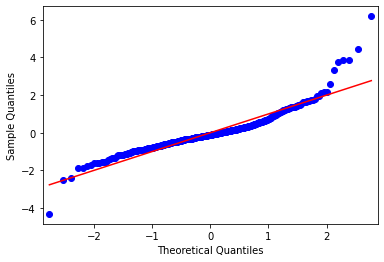

In [5]:
fig = sm.qqplot(result.resid, fit=True, line="s")
plt.show()

In [6]:
result.pvalues < 0.05

CRIM        True
ZN          True
INDUS      False
CHAS       False
NOX        False
RM          True
AGE        False
DIS         True
RAD         True
TAX         True
PTRATIO     True
B           True
LSTAT       True
dtype: bool

In [7]:
predicted = result.predict(X_test)

print("r2 score: {}".format(metrics.r2_score(y_test, predicted)))
print("mse: {}".format(metrics.mean_squared_error(y_test, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
print("mae: {}".format(metrics.mean_absolute_error(y_test, predicted)))

r2 score: 0.6323339647752567
mse: 29.06293435588113
rmse: 5.391004948604771
mae: 3.5502772968074825


### Full model with an intercept


In [8]:
model = sm.OLS(y_train, sm.add_constant(X_train))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     87.53
Date:                Tue, 09 Mar 2021   Prob (F-statistic):          5.54e-100
Time:                        09:39:58   Log-Likelihood:                -1032.1
No. Observations:                 354   AIC:                             2092.
Df Residuals:                     340   BIC:                             2146.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.4581      5.652      6.627      0.0

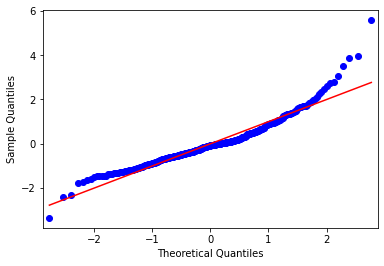

In [9]:
fig = sm.qqplot(result.resid, fit=True, line="s")
plt.show()

In [10]:
predicted = result.predict(sm.add_constant(X_test))

print("r2 score: {}".format(metrics.r2_score(y_test, predicted)))
print("mse: {}".format(metrics.mean_squared_error(y_test, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
print("mae: {}".format(metrics.mean_absolute_error(y_test, predicted)))

r2 score: 0.6518162601236774
mse: 27.522915380598498
rmse: 5.2462286816911154
mae: 3.6116720337235417


## Fitting models using R-style formulas
We can also fit a model with the R syntax `y ~ x_1 + x_2` and build some complexer models.

In [11]:
dat = X_train.copy()
dat['MEDV'] = y_train
dat.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
202,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97,7.0
213,0.14052,0.0,10.59,0.0,0.489,6.375,32.3,3.9454,4.0,277.0,18.6,385.81,9.38,28.1
75,0.09512,0.0,12.83,0.0,0.437,6.286,45.0,4.5026,5.0,398.0,18.7,383.23,8.94,21.4
338,0.03306,0.0,5.19,0.0,0.515,6.059,37.3,4.8122,5.0,224.0,20.2,396.14,8.51,20.6


### Full model with an intercept

In [12]:
result = smf.ols('MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B', data=dat).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     66.05
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           2.48e-81
Time:                        09:39:58   Log-Likelihood:                -1079.6
No. Observations:                 354   AIC:                             2185.
Df Residuals:                     341   BIC:                             2235.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.8055      6.180      3.366      0.0

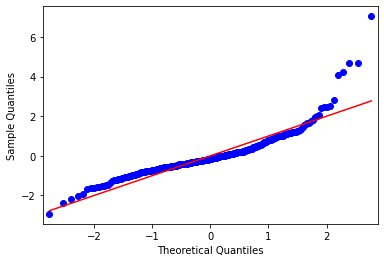

In [13]:
fig = sm.qqplot(result.resid, fit=True, line="s")

plt.show()

In [14]:
predicted = result.predict(X_test)

print("r2 score: {}".format(metrics.r2_score(y_test, predicted)))
print("mse: {}".format(metrics.mean_squared_error(y_test, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
print("mae: {}".format(metrics.mean_absolute_error(y_test, predicted)))

r2 score: 0.6335989682884833
mse: 28.96293949494057
rmse: 5.381722725572228
mae: 3.485515509934475


### Model with a polynomial and the target variable log transformed

In [15]:
result = smf.ols('np.log(MEDV) ~ CRIM + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + pow(AGE, 2)', data=dat).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     79.15
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           7.32e-83
Time:                        09:39:58   Log-Likelihood:                 20.712
No. Observations:                 354   AIC:                            -19.42
Df Residuals:                     343   BIC:                             23.14
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.1962      0.275     11.616      

Let's plot the QQ-Plot for the residuals

In [16]:
result.pvalues < 0.05

Intercept      True
CRIM           True
CHAS           True
NOX            True
RM             True
DIS            True
RAD            True
TAX            True
PTRATIO        True
B              True
pow(AGE, 2)    True
dtype: bool

In [17]:
predicted = np.exp(result.predict(X_test))

print("r2 score: {}".format(metrics.r2_score(y_test, predicted)))
print("mse: {}".format(metrics.mean_squared_error(y_test, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
print("mae: {}".format(metrics.mean_absolute_error(y_test, predicted)))

r2 score: 0.6532316568787859
mse: 27.41103236982187
rmse: 5.235554638223334
mae: 3.0177991824546915


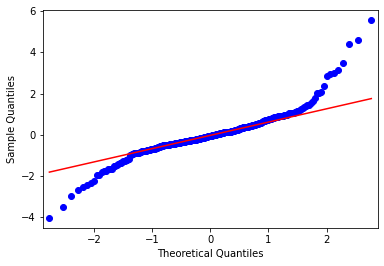

In [18]:
fig = sm.qqplot(result.resid, fit=True, line="q")
plt.show()